In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/cleaned_total_reviews.csv')
df.head()

,review_id,Bank,review,ratings,thumbs_Up_Count,review_App_Version,review_time,manual_labels,ratings_label,tokens
0,101,Barclays,not smoothest easiest apps navigate . but choi...,2,28,2.89.0,2024-02-27 12:49:00,Neutral,negative,"['not', 'smoothest', 'easiest', 'apps', 'navig..."
1,102,Barclays,app has good features eg let 's track spend ca...,3,102,2.88.2,2024-02-10 09:35:00,Neutral,neutral,"['app', 'has', 'good', 'features', 'eg', 'let'..."
2,103,Barclays,easy app use . easy navigate fast making trans...,5,84,2.89.0,2024-02-20 11:33:00,Positive,positive,"['easy', 'app', 'use', '.', 'easy', 'navigate'..."
3,104,Barclays,pointless app . i can see much i owe and pay o...,1,0,2.89.0,2024-02-28 14:06:00,Negative,negative,"['pointless', 'app', '.', 'i', 'can', 'see', '..."
4,105,Barclays,update . issue was resolved quickly and i 'm r...,5,2,2.89.0,2024-02-27 16:41:00,Positive,positive,"['update', '.', 'issue', 'was', 'resolved', 'q..."


In [6]:
# Convert 'review_time' to datetime and extract the year
df['review_time'] = pd.to_datetime(df['review_time'])
df['year'] = df['review_time'].dt.year

In [7]:
# Display the first few rows to confirm the year column is added correctly
df[['review_time', 'year']].head()

,review_time,year
0,2024-02-27 12:49:00,2024
1,2024-02-10 09:35:00,2024
2,2024-02-20 11:33:00,2024
3,2024-02-28 14:06:00,2024
4,2024-02-27 16:41:00,2024


In [8]:
import matplotlib.pyplot as plt

In [9]:
# Grouping the data by year and manual_labels to count the occurrences
yearly_sentiment_counts = df.groupby(['year', 'manual_labels']).size().unstack(fill_value=0)

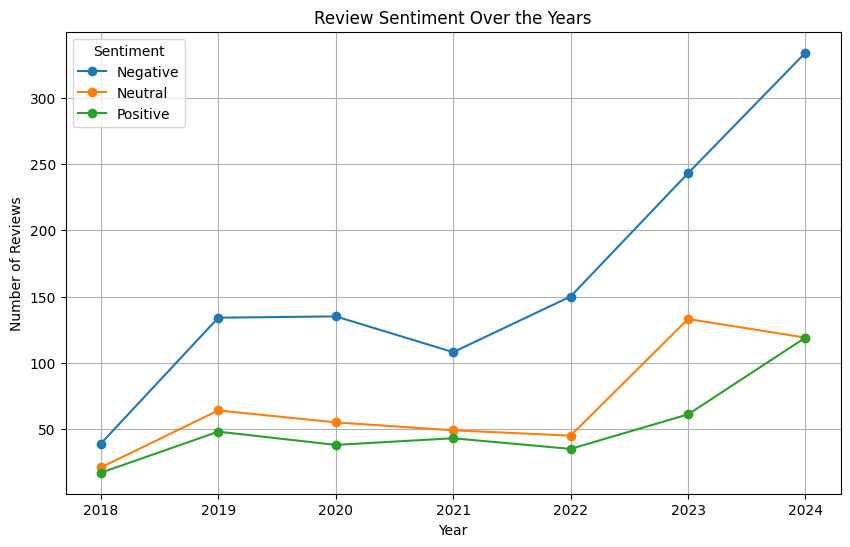

In [12]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
for sentiment in yearly_sentiment_counts.columns:
    plt.plot(yearly_sentiment_counts.index, yearly_sentiment_counts[sentiment], marker='o', label=sentiment)
plt.title('Review Sentiment Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()